<a href="https://colab.research.google.com/github/w4bo/teaching-handsondatapipelines/blob/main/materials/16_ASAI_Hackathon_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The `Diabetes` challenge

### Goal

It is your job to predict the `Outcome` of diabetes for each patient.

### TODO

You are allowed to use `numpy`, `pandas`, `matplotlib`, `sns`, and `sk-learn` Python libraries. You can import any model from `sk-learn`.

You are asked to fulfill the following steps; remember to write your insights on the dataset in the card below.

1. Feature pre-processing (e.g., remove useless features, impute missing values, encode some features)
2. Verify the distribution of "Outcome" values
3. Check pairwise correlations among features
4. Split training and test data. When splitting train and test datasets, the test dataset should contain 30% of the data.
5. Plot the training dataset in 2D, are the outcomes separated?
6. Train at least two ML classification models; submissions are evaluated using the accuracy score.
7. Perform hyperparameter optimization for at least one model

In [ ]:
# Briefly explain *HERE* the overall steps of your solution (e.g., what did you do and why).
# Briefly write the extracted outcome/insights of each of the previous points here.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from scipy.stats import randint
import seaborn as sns
from sklearn import metrics


# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/diabetes.mod.csv")
df

# Esplorazione del dominio

- Cos'è il diabete?
- Come si diagnostica?
- Qual è il significato delle variabili che abbiamo a disposizione

Dataset del '94

In [ ]:
# Rimozione colonna index non necessaria
df.drop(columns=df.columns[0], axis=1,  inplace=True)

In [ ]:
# BMI ha dei valori nulli, Outcome è categorico
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       755 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
# 500 non diabetici, 268 diabetici
df['Outcome'].value_counts()

N    500
Y    268
Name: Outcome, dtype: int64

In [ ]:
# 5 positivi, 8 negativi con BMI nullo
df = df[df['BMI'].notnull()]

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,755.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992450,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.951837,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Y
1,1,85,66,29,0,26.6,0.351,31,N
2,8,183,64,0,0,23.3,0.672,32,Y
3,1,89,66,23,94,28.1,0.167,21,N
4,0,137,40,35,168,43.1,2.288,33,Y
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,N
764,2,122,70,27,0,36.8,0.340,27,N
765,5,121,72,23,112,26.2,0.245,30,N
766,1,126,60,0,0,30.1,0.349,47,Y


In [ ]:
df.drop(df.columns[0],axis=1,inplace=True)

In [ ]:
def convert_to_binary(value):
    if value == 'Y':
        return 1
    elif value == 'N':
        return 0
    else:
        return None

df['Outcome'] = df['Outcome'].apply(convert_to_binary)

<ipython-input-86-aad953319106>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outcome'] = df['Outcome'].apply(convert_to_binary)


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,3.854305,121.172185,68.998675,20.472848,79.713907,31.992450,0.472114,33.210596
std,3.381172,31.667445,19.454190,15.991302,115.565133,7.951837,0.331941,11.784398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.200000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.300000,0.370000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,126.500000,36.600000,0.628000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<Axes: >

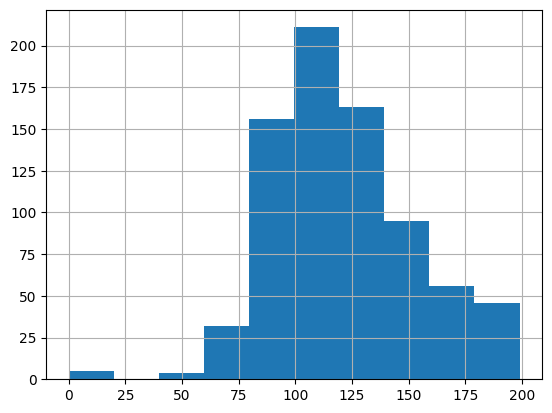

In [ ]:
df["Glucose"].hist(bins=10)

(0.0, 5.0)

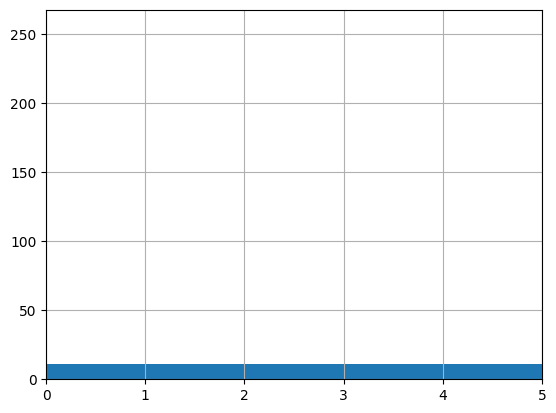

In [ ]:
hist = df["BMI"].hist()
hist.set_xlim((0,5))



<Axes: >

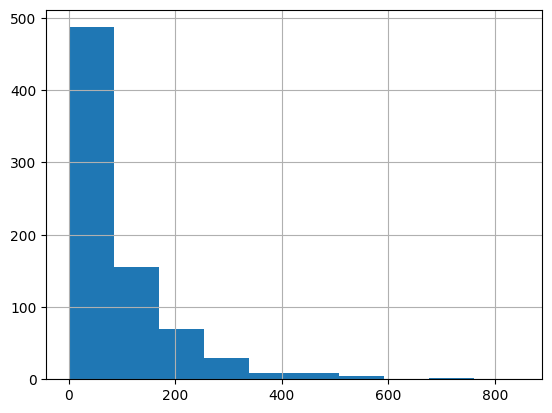

In [ ]:
df["Insulin"].hist(bins=10)

<Axes: >

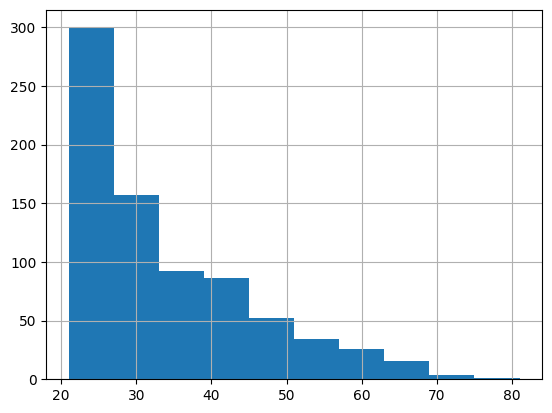

In [ ]:
df["Age"].hist(bins=10)

<Axes: >

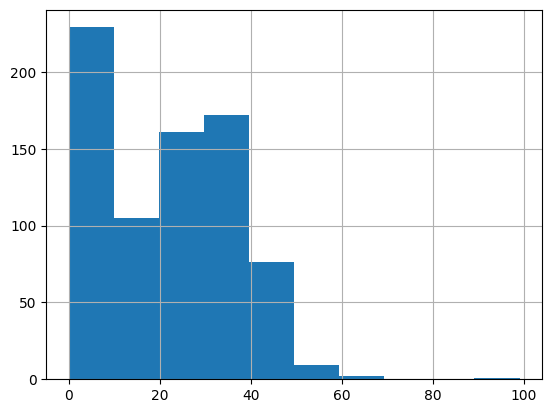

In [ ]:
df["SkinThickness"].hist()

In [ ]:
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       755 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


<Axes: >

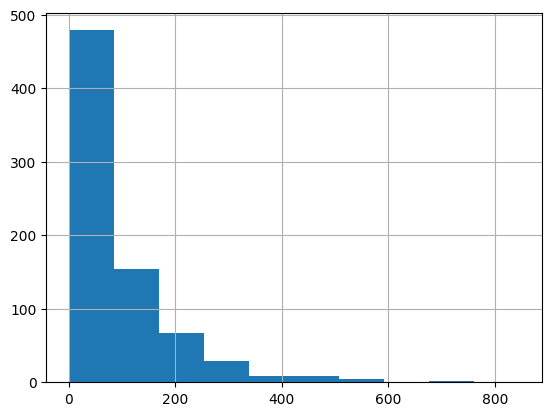

In [ ]:
df['Insulin'].hist()

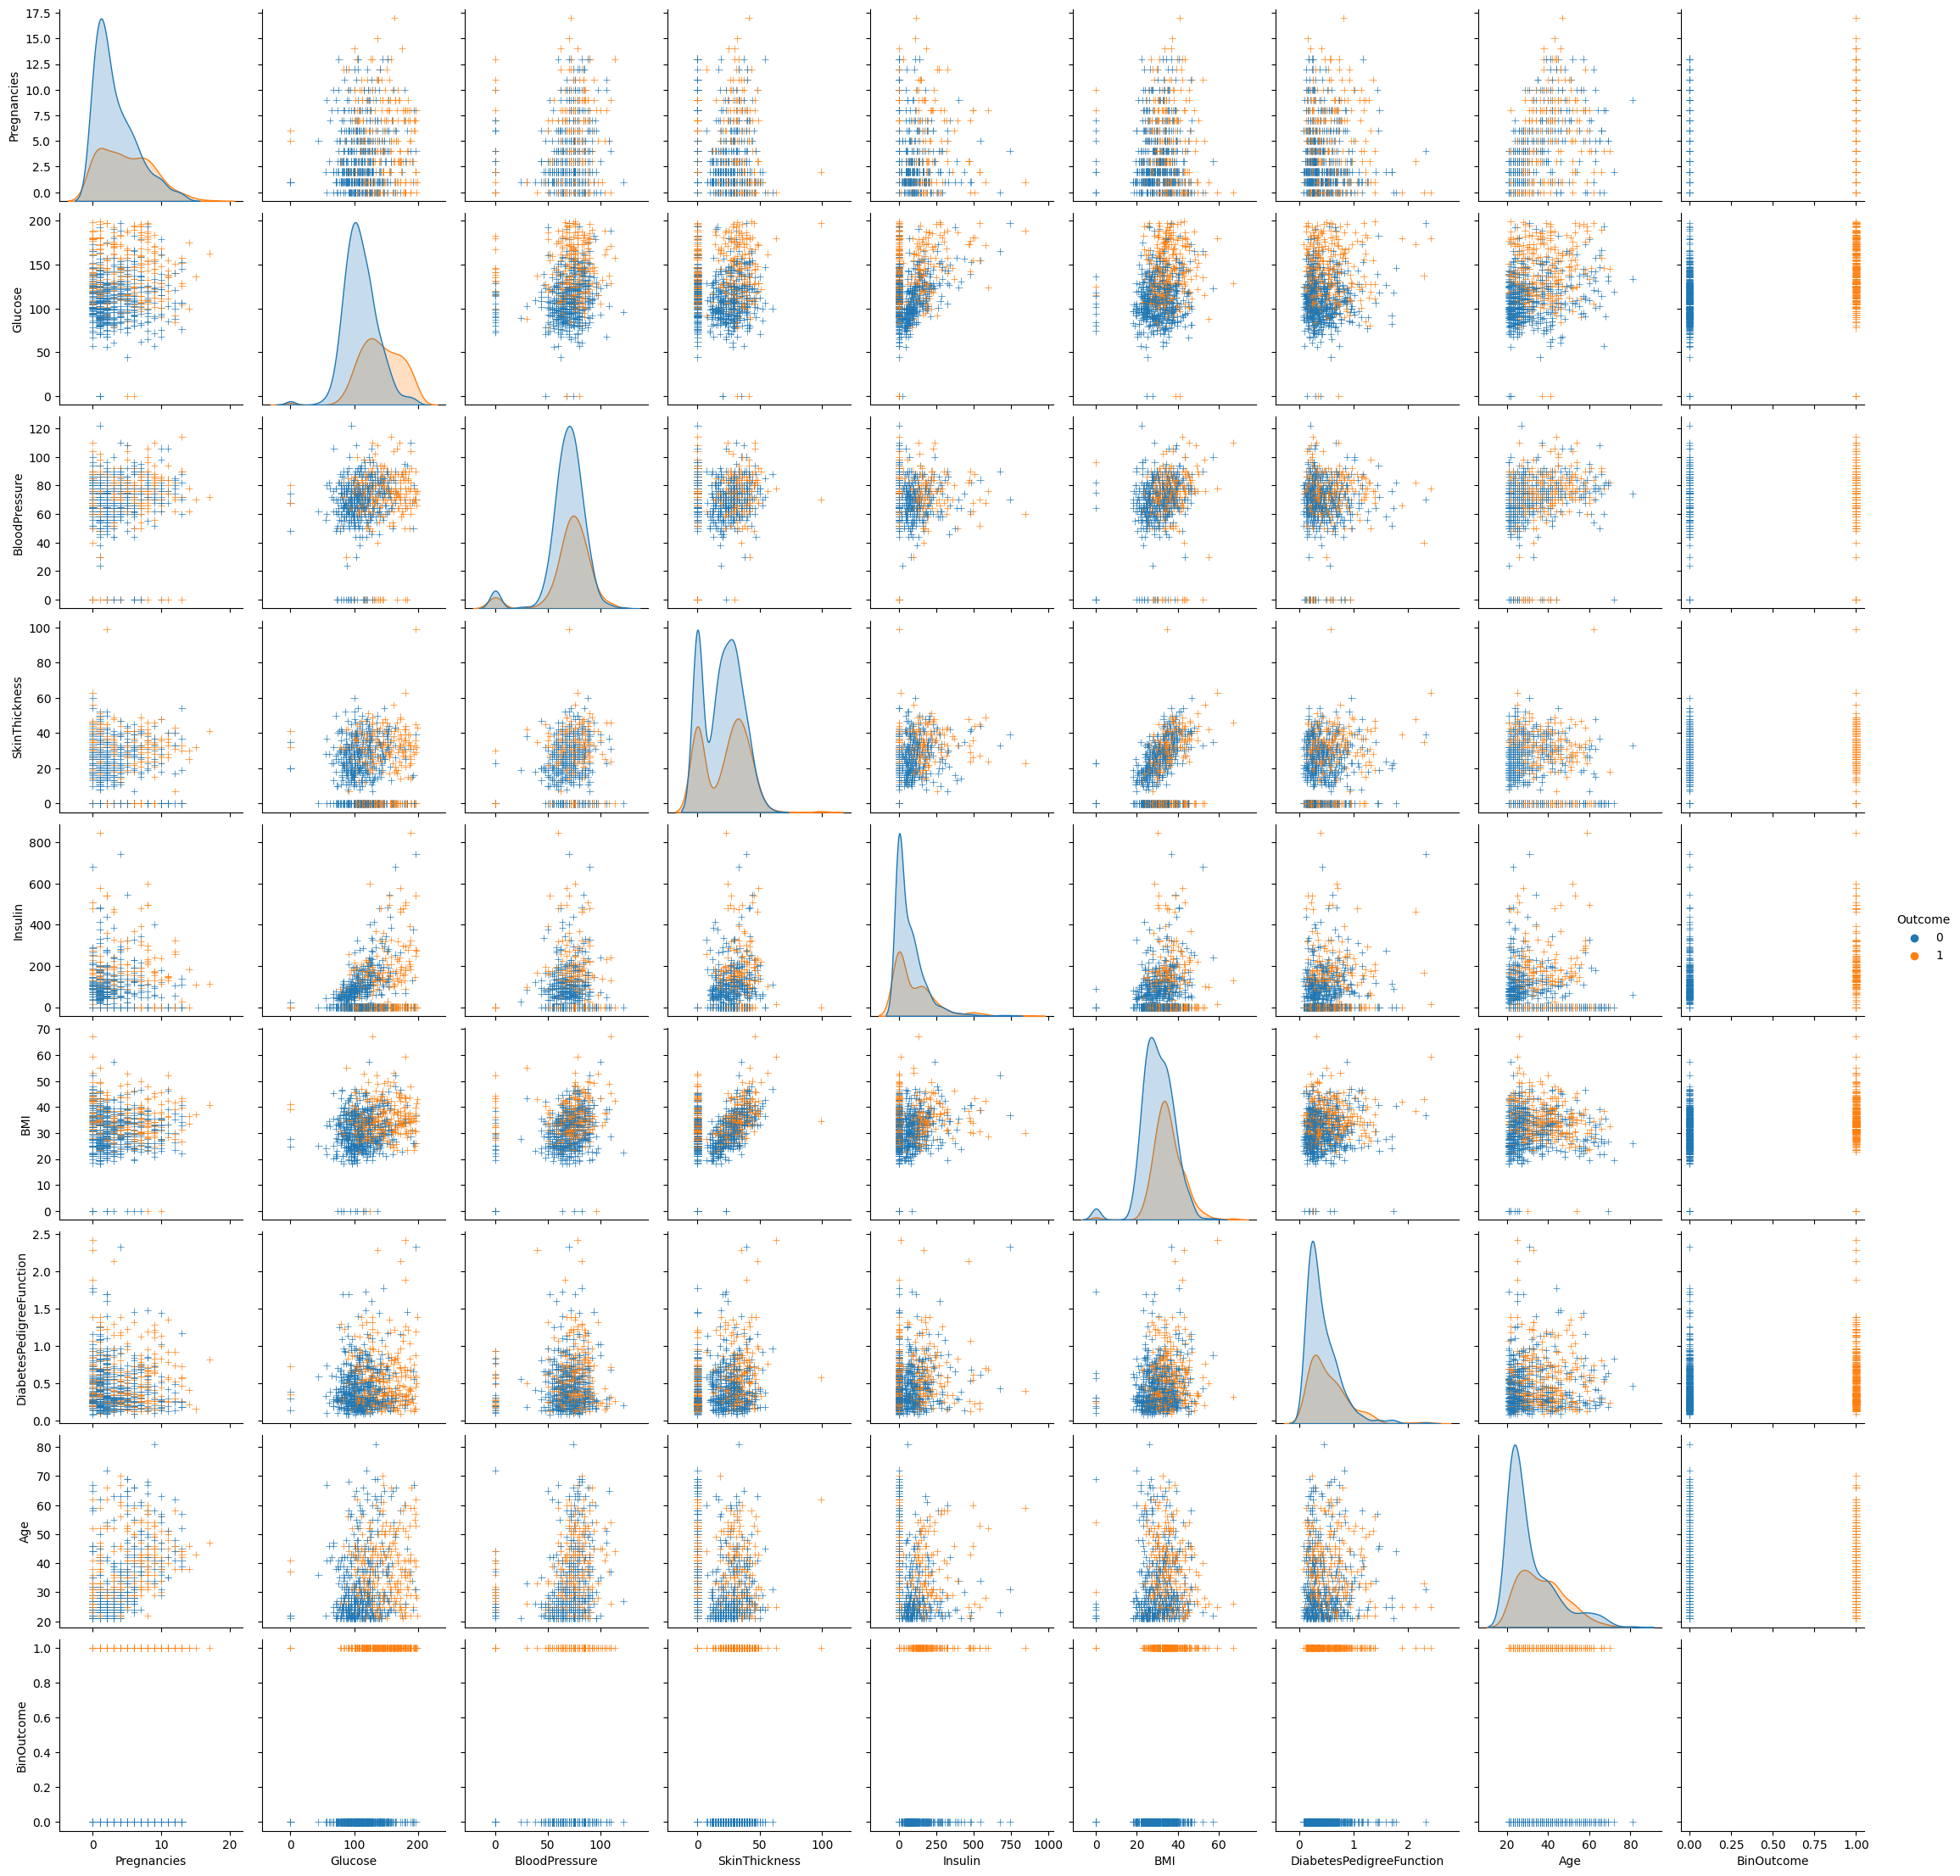

In [ ]:
sns.pairplot(df.sample(n=768, random_state=42), markers='+', hue="Outcome")
plt.show()

In [ ]:
# creazione matrice di correlazioni tra le colonne
sns.heatmap(df.corr(), annot=True)

<Axes: >

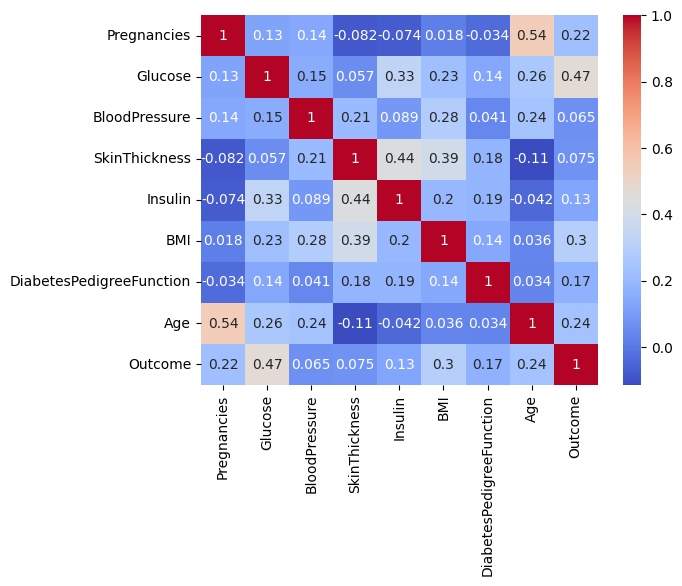

In [ ]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data_included = df[columns]
sns.heatmap(data_included.corr(), annot=True, cmap='coolwarm')

0    0.651042
1    0.348958
Name: Outcome, dtype: float64


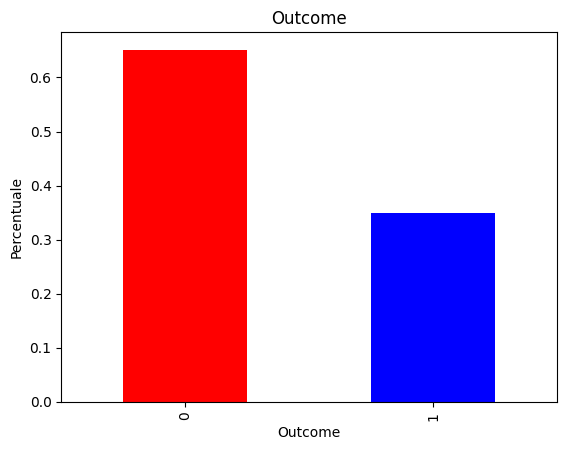

In [ ]:
# istogramma della colonna di Outcome per vedere distribuzione dei positivi e negativi. Stampo la percentuale: 65% positivi, 35% negativi
print(df['Outcome'].value_counts(normalize=True))
df['Outcome'].value_counts(normalize=True).plot(kind='bar', color=['red', 'blue'])
plt.title('Outcome')
plt.xlabel('Outcome')
plt.ylabel('Percentuale')
plt.show()

In [ ]:
#Eliminiamo i record con BMI vuoto
df = df[df['BMI'].notnull()]

# Random Forest

In [ ]:
df = df.drop(columns='BinOutcome',axis=1)

In [ ]:
df.loc[:, df.columns != 'Outcome']

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
from sklearn import tree
X = df.loc[:, df.columns != 'Outcome']
Y = df['Outcome']
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=2)
clf = clf.fit(X, Y)

[Text(248.0, 308.0, 'X[1] <= 127.5\ngini = 0.454\nsamples = 755\nvalue = [492, 263]'),
 Text(124.0, 184.79999999999998, 'X[7] <= 28.5\ngini = 0.312\nsamples = 476\nvalue = [384, 92]'),
 Text(62.0, 61.599999999999966, 'gini = 0.156\nsamples = 269\nvalue = [246, 23]'),
 Text(186.0, 61.599999999999966, 'gini = 0.444\nsamples = 207\nvalue = [138, 69]'),
 Text(372.0, 184.79999999999998, 'X[5] <= 29.95\ngini = 0.475\nsamples = 279\nvalue = [108, 171]'),
 Text(310.0, 61.599999999999966, 'gini = 0.432\nsamples = 76\nvalue = [52, 24]'),
 Text(434.0, 61.599999999999966, 'gini = 0.4\nsamples = 203\nvalue = [56, 147]')]

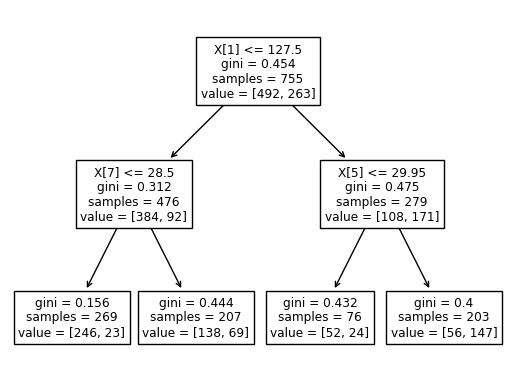

In [ ]:
tree.plot_tree(clf)

In [ ]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,755.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992450,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.951837,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.200000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Tra i pz con BMI Alto quale eta anno e che outcome hanno

# Split del dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train = X
y_train = Y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.33, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=2)
clf = clf.fit(X_train, y_train)

[Text(248.0, 308.0, 'X[1] <= 127.5\ngini = 0.453\nsamples = 505\nvalue = [330, 175]'),
 Text(124.0, 184.79999999999998, 'X[7] <= 28.5\ngini = 0.306\nsamples = 329\nvalue = [267, 62]'),
 Text(62.0, 61.599999999999966, 'gini = 0.148\nsamples = 186\nvalue = [171, 15]'),
 Text(186.0, 61.599999999999966, 'gini = 0.441\nsamples = 143\nvalue = [96, 47]'),
 Text(372.0, 184.79999999999998, 'X[5] <= 29.95\ngini = 0.46\nsamples = 176\nvalue = [63, 113]'),
 Text(310.0, 61.599999999999966, 'gini = 0.426\nsamples = 39\nvalue = [27, 12]'),
 Text(434.0, 61.599999999999966, 'gini = 0.387\nsamples = 137\nvalue = [36, 101]')]

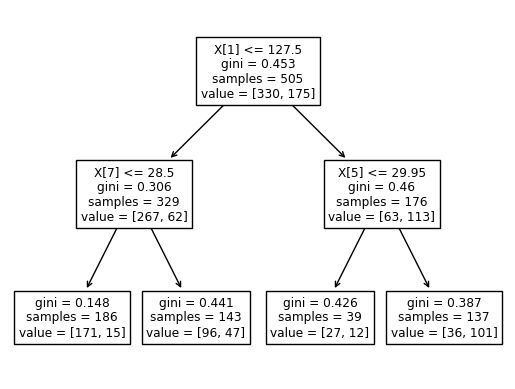

In [ ]:
tree.plot_tree(clf)

In [ ]:
from sklearn.metrics import classification_report

y_true = y_test
y_pred = clf.predict(X_test)
target_names = ['NO', 'YES']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.77      0.88      0.82       162
         YES       0.70      0.52      0.60        88

    accuracy                           0.75       250
   macro avg       0.73      0.70      0.71       250
weighted avg       0.75      0.75      0.74       250



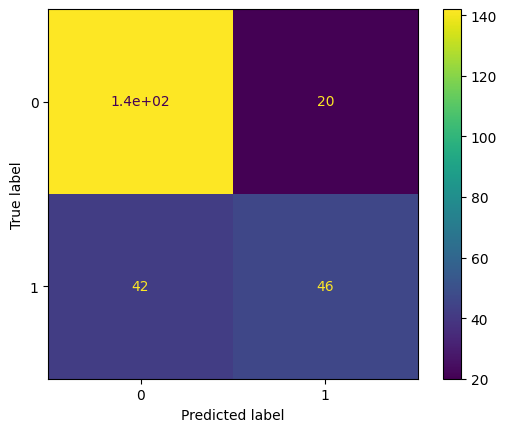

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

confusion_matrix(y_true, y_pred)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

PCA

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
df = df[df['BMI'].notnull()]

pca = PCA(n_components='mle')
pca.fit(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']],df[['Outcome']])
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca_features = pca.fit_transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']],df[['Outcome']])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    pca_features,
    labels=labels,
    dimensions=range(7),
    color=df["Outcome"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

print('Shape before PCA: ', df.shape)
print('Shape after PCA: ', pca_features.shape)


t = pd.DataFrame(pca_features)
t['Outcome'] = df['Outcome']







[8.89695359e-01 6.03595495e-02 2.58567363e-02 1.31246213e-02
 7.39241279e-03 3.04999108e-03 5.14536354e-04]
[3193.84080962  831.88941467  544.47689656  387.9144828   291.12916053
  187.00012123   76.80697053]


Shape before PCA:  (755, 9)
Shape after PCA:  (755, 7)


In [ ]:
!pip install "flaml[automl]"

In [ ]:
from flaml import AutoML


# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": 'f1',
    "task": 'classification',
    "log_file_name": "iris.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)
# Predict
print(automl.predict_proba(X_train))
# Print the best model
print(automl.model.estimator)

In [ ]:
y_pred = automl.predict(X_test)

In [ ]:
X_train = X
y_train = Y

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_features=0.34266499205249945, max_leaf_nodes=7,
                       n_estimators=4, n_jobs=-1, random_state=12032022)
clf.fit(X_train, y_train)


RandomForestClassifier(max_features=0.34266499205249945, max_leaf_nodes=7,
                       n_estimators=4, n_jobs=-1, random_state=12032022)

In [ ]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = clf.predict(X_test)
target_names = ['NO', 'YES']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.75      0.90      0.82       162
         YES       0.71      0.44      0.55        88

    accuracy                           0.74       250
   macro avg       0.73      0.67      0.68       250
weighted avg       0.73      0.74      0.72       250



In [ ]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.81      0.79      0.80       162
         YES       0.63      0.65      0.64        88

    accuracy                           0.74       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.74      0.74      0.74       250



# Modifica delle variabili

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from scipy.stats import randint
import seaborn as sns
from sklearn import metrics


# SEED all random generators
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/diabetes.mod.csv")
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Y
1,1,1,85,66,29,0,26.6,0.351,31,N
2,2,8,183,64,0,0,23.3,0.672,32,Y
3,3,1,89,66,23,94,28.1,0.167,21,N
4,4,0,137,40,35,168,43.1,2.288,33,Y
...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,N
764,764,2,122,70,27,0,36.8,0.340,27,N
765,765,5,121,72,23,112,26.2,0.245,30,N
766,766,1,126,60,0,0,30.1,0.349,47,Y


In [ ]:
# Rimozione colonna index non necessaria
df.drop(columns=df.columns[0], axis=1,  inplace=True)

In [ ]:
df = df[df['BMI'].notnull()]

In [ ]:
# Bin 'BMI' into categories
import numpy as np
bins = [-1, 18.5, 25, 30, 35, 40, np.inf]
labels = ['Underweight', 'Normal', 'Overweight', 'Overweight 2', 'Overweight 3', 'Overweight 4']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

# i valori di insulina a 0 lo trasformo in NaN
df['Insulin'].replace(0, np.nan, inplace=True)
# i valori di SkinThickness a 0 lo trasformo in NaN
df['SkinThickness'].replace(0, np.nan, inplace=True)

# Calcolo la media rispetto al BMI e rispetto all'Outcome
mean_values = df.groupby(['BMI_Category', 'Outcome'])[['Insulin', 'SkinThickness']].mean()
# Applico per ogni categoria di BMI e per ogni Outcome (Outcome = 0 o 1) il valor medio per insulina e pelle

# Loop over each 'BMI_Category' and 'Outcome' and apply the means to the missing insulin and skin thickness values
for bmi_cat in labels:
    for outcome in df['Outcome'].unique():  # This will iterate over each unique value in 'Outcome' column
        df.loc[(df['Insulin'].isnull()) & (df['BMI_Category'] == bmi_cat) & (df['Outcome'] == outcome), 'Insulin'] = mean_values.loc[(bmi_cat, outcome), 'Insulin']
        df.loc[(df['SkinThickness'].isnull()) & (df['BMI_Category'] == bmi_cat) & (df['Outcome'] == outcome), 'SkinThickness'] = mean_values.loc[(bmi_cat, outcome), 'SkinThickness']

# Riporto in numerico la classe categorica di BMI
df['BMI_Category'] = df['BMI_Category'].map({'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Overweight 2': 3, 'Overweight 3': 4, 'Overweight 4': 5})
# Calculate overall mean for 'Insulin' and 'SkinThickness'
overall_mean_insulin = df['Insulin'].mean()
overall_mean_skinthickness = df['SkinThickness'].mean()
def convert_to_binary(value):
    if value == 'Y':
        return 1
    elif value == 'N':
        return 0
    else:
        return None

df['Outcome'] = df['Outcome'].apply(convert_to_binary)

# Fill remaining nulls with overall mean
df['Insulin'].fillna(overall_mean_insulin, inplace=True)
df['SkinThickness'].fillna(overall_mean_skinthickness, inplace=True)
df.drop(columns='BMI',axis=1,inplace=True)
df

<ipython-input-110-1caf19571b17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)
<ipython-input-110-1caf19571b17>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insulin'].replace(0, np.nan, inplace=True)
<ipython-input-110-1caf19571b17>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'].rep

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,BMI_Category
0,6,148,72,35.000000,221.260870,0.627,50,1,3
1,1,85,66,29.000000,108.014286,0.351,31,0,2
2,8,183,64,15.000000,96.000000,0.672,32,1,1
3,1,89,66,23.000000,94.000000,0.167,21,0,2
4,0,137,40,35.000000,168.000000,2.288,33,1,5
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,0.171,63,0,3
764,2,122,70,27.000000,158.019608,0.340,27,0,4
765,5,121,72,23.000000,112.000000,0.245,30,0,2
766,1,126,60,32.333333,221.260870,0.349,47,1,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               755 non-null    int64   
 1   Glucose                   755 non-null    int64   
 2   BloodPressure             755 non-null    int64   
 3   SkinThickness             755 non-null    float64 
 4   Insulin                   755 non-null    float64 
 5   DiabetesPedigreeFunction  755 non-null    float64 
 6   Age                       755 non-null    int64   
 7   Outcome                   755 non-null    int64   
 8   BMI_Category              755 non-null    category
dtypes: category(1), float64(3), int64(5)
memory usage: 54.0 KB


#Normalizzazione

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X = df.loc[:, df.columns != 'Outcome']
Y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.33, random_state=42)
len(X_train)


505

In [ ]:
# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 120,  # in seconds
    "metric": 'f1',
    "task": 'classification',
    "log_file_name": "iris.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)
# Predict
print(automl.predict_proba(X_train))
# Print the best model
print(automl.model.estimator)

[flaml.automl.logger: 07-28 10:58:58] {1693} INFO - task = classification
[flaml.automl.logger: 07-28 10:58:58] {1700} INFO - Data split method: stratified
[flaml.automl.logger: 07-28 10:58:58] {1703} INFO - Evaluation method: cv
[flaml.automl.logger: 07-28 10:58:58] {1801} INFO - Minimizing error metric: 1-f1
[flaml.automl.logger: 07-28 10:58:58] {1911} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 07-28 10:58:58] {2221} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 07-28 10:58:58] {2347} INFO - Estimated sufficient time budget=1863s. Estimated necessary time budget=43s.
[flaml.automl.logger: 07-28 10:58:58] {2394} INFO -  at 0.3s,	estimator lgbm's best error=0.4978,	best estimator lgbm's best error=0.4978
[flaml.automl.logger: 07-28 10:58:58] {2221} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 07-28 10:58:58] {2394} INFO -  at 0.4s,	estimator lgbm's best error=0.4978

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:00] {2394} INFO -  at 2.5s,	estimator xgboost's best error=0.2979,	best estimator lgbm's best error=0.2860
[flaml.automl.logger: 07-28 10:59:00] {2221} INFO - iteration 4, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:01] {2394} INFO -  at 2.9s,	estimator extra_tree's best error=0.6404,	best estimator lgbm's best error=0.2860
[flaml.automl.logger: 07-28 10:59:01] {2221} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 07-28 10:59:01] {2394} INFO -  at 3.1s,	estimator lgbm's best error=0.2402,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:01] {2221} INFO - iteration 6, current learner lgbm
[flaml.automl.logger: 07-28 10:59:01] {2394} INFO -  at 3.3s,	estimator lgbm's best error=0.2402,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:01] {2221} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 07-28 10:59:02] {2394} INFO -  at 3.8s,	estimator lgbm's best error

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:04] {2394} INFO -  at 5.7s,	estimator xgboost's best error=0.2427,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:04] {2221} INFO - iteration 15, current learner xgboost
[flaml.automl.logger: 07-28 10:59:04] {2394} INFO -  at 5.8s,	estimator xgboost's best error=0.2427,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:04] {2221} INFO - iteration 16, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:04] {2394} INFO -  at 6.1s,	estimator rf's best error=0.2749,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:04] {2221} INFO - iteration 17, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:04] {2394} INFO -  at 6.3s,	estimator extra_tree's best error=0.4899,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:04] {2221} INFO - iteration 18, current learner lgbm
[flaml.automl.logger: 07-28 10:59:04] {2394} INFO -  at 6.4s,	estimator lgbm's best error=0.2402,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:04] {2221} INFO - iteration 19, current learner xgboost
[flaml.automl.logger: 07-28 10:59:04] {2394} INFO -  at 6.5s,	estimator xgboost's best error=0.2427,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:04] {2221} INFO - iteration 20, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:05] {2394} INFO -  at 6.7s,	estimator xgboost's best error=0.2427,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:05] {2221} INFO - iteration 21, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:05] {2394} INFO -  at 6.8s,	estimator xgboost's best error=0.2427,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:05] {2221} INFO - iteration 22, current learner lgbm
[flaml.automl.logger: 07-28 10:59:05] {2394} INFO -  at 6.9s,	estimator lgbm's best error=0.2402,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:05] {2221} INFO - iteration 23, current learner rf
[flaml.automl.logger: 07-28 10:59:05] {2394} INFO -  at 7.3s,	estimator rf's best error=0.2669,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:05] {2221} INFO - iteration 24, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:05] {2394} INFO -  at 7.5s,	estimator extra_tree's best error=0.4899,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:05] {2221} INFO - iteration 25, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:06] {2394} INFO -  at 7.8s,	estimator extra_tree'

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:06] {2394} INFO -  at 8.5s,	estimator extra_tree's best error=0.3524,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:06] {2221} INFO - iteration 29, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:07] {2394} INFO -  at 8.8s,	estimator extra_tree's best error=0.3524,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:07] {2221} INFO - iteration 30, current learner lgbm
[flaml.automl.logger: 07-28 10:59:09] {2394} INFO -  at 11.0s,	estimator lgbm's best error=0.2402,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:09] {2221} INFO - iteration 31, current learner lgbm
[flaml.automl.logger: 07-28 10:59:10] {2394} INFO -  at 11.7s,	estimator lgbm's best error=0.2402,	best estimator lgbm's best error=0.2402
[flaml.automl.logger: 07-28 10:59:10] {2221} INFO - iteration 32, current learner rf
[flaml.automl.logger: 07-28 10:59:10] {2394} INFO -  at 12.2s,	estimator rf's best

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:13] {2394} INFO -  at 14.9s,	estimator xgboost's best error=0.2427,	best estimator lgbm's best error=0.2265
[flaml.automl.logger: 07-28 10:59:13] {2221} INFO - iteration 41, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:13] {2394} INFO -  at 15.1s,	estimator xgboost's best error=0.2394,	best estimator lgbm's best error=0.2265
[flaml.automl.logger: 07-28 10:59:13] {2221} INFO - iteration 42, current learner lgbm
[flaml.automl.logger: 07-28 10:59:13] {2394} INFO -  at 15.2s,	estimator lgbm's best error=0.2238,	best estimator lgbm's best error=0.2238
[flaml.automl.logger: 07-28 10:59:13] {2221} INFO - iteration 43, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:13] {2394} INFO -  at 15.3s,	estimator lgbm's best error=0.2221,	best estimator lgbm's best error=0.2221
[flaml.automl.logger: 07-28 10:59:13] {2221} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:14] {2394} INFO -  at 15.6s,	estimator extra_tree's best error=0.3460,	best estimator lgbm's best error=0.2221
[flaml.automl.logger: 07-28 10:59:14] {2221} INFO - iteration 45, current learner lgbm
[flaml.automl.logger: 07-28 10:59:14] {2394} INFO -  at 15.8s,	estimator lgbm's best error=0.2221,	best estimator lgbm's best error=0.2221
[flaml.automl.logger: 07-28 10:59:14] {2221} INFO - iteration 46, current learner lgbm
[flaml.automl.logger: 07-28 10:59:14] {2394} INFO -  at 15.9s,	estimator lgbm's best error=0.2221,	best estimator lgbm's best error=0.2221
[flaml.automl.logger: 07-28 10:59:14] {2221} INFO - iteration 47, current learner lgbm
[flaml.automl.logger: 07-28 10:59:15] {2394} INFO -  at 16.6s,	estimator lgbm's best

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:15] {2394} INFO -  at 17.4s,	estimator lgbm's best error=0.2221,	best estimator lgbm's best error=0.2221
[flaml.automl.logger: 07-28 10:59:15] {2221} INFO - iteration 52, current learner lgbm
[flaml.automl.logger: 07-28 10:59:16] {2394} INFO -  at 17.6s,	estimator lgbm's best error=0.2221,	best estimator lgbm's best error=0.2221
[flaml.automl.logger: 07-28 10:59:16] {2221} INFO - iteration 53, current learner lgbm
[flaml.automl.logger: 07-28 10:59:16] {2394} INFO -  at 18.2s,	estimator lgbm's best error=0.2221,	best estimator lgbm's best error=0.2221
[flaml.automl.logger: 07-28 10:59:16] {2221} INFO - iteration 54, current learner lgbm
[flaml.automl.logger: 07-28 10:59:17] {2394} INFO -  at 18.7s,	estimator lgbm's best error=0.2221,	best estimator lgbm's best error=0.2221
[flaml.automl.logger: 07-28 10:59:17] {2221} INFO - iteration 55, current learner rf
[flaml.automl.logger: 07-28 10:59:17] {2394} INFO -  at 19.0s,	estimator rf's best error=0.2669,	b

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:25] {2394} INFO -  at 27.2s,	estimator xgboost's best error=0.2394,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:25] {2221} INFO - iteration 73, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:25] {2394} INFO -  at 27.4s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:25] {2221} INFO - iteration 74, current learner xgboost
[flaml.automl.logger: 07-28 10:59:26] {2394} INFO -  at 27.6s,	estimator xgboost's best error=0.2394,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:26] {2221} INFO - iteration 75, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:26] {2394} INFO -  at 27.7s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:26] {2221} INFO - iteration 76, current learner lgbm
[flaml.automl.logger: 07-28 10:59:26] {2394} INFO -  at 27.8s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:26] {2221} INFO - iteration 77, current learner rf
[flaml.automl.logger: 07-28 10:59:26] {2394} INFO -  at 28.1s,	estimator rf's best error=0.2593,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:26] {2221} INFO - iteration 78, current learner lgbm
[flaml.automl.logger: 07-28 10:59:26] {2394} INFO -  at 28.2s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:26] {2221} INFO - iteration 79, current learner lgbm
[flaml.automl.logger: 07-28 10:59:26] {2394} INFO -  at 28.3s,	estimator lgbm's best error=0.2105,	b

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:27] {2394} INFO -  at 28.6s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:27] {2221} INFO - iteration 82, current learner lgbm
[flaml.automl.logger: 07-28 10:59:27] {2394} INFO -  at 28.8s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:27] {2221} INFO - iteration 83, current learner lgbm
[flaml.automl.logger: 07-28 10:59:27] {2394} INFO -  at 28.9s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:27] {2221} INFO - iteration 84, current learner xgboost
[flaml.automl.logger: 07-28 10:59:27] {2394} INFO -  at 29.0s,	estimator xgboost's best error=0.2394,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:27] {2221} INFO - iteration 85, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:27] {2394} INFO -  at 29.2s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:27] {2221} INFO - iteration 86, current learner lgbm
[flaml.automl.logger: 07-28 10:59:27] {2394} INFO -  at 29.4s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:27] {2221} INFO - iteration 87, current learner lgbm
[flaml.automl.logger: 07-28 10:59:27] {2394} INFO -  at 29.5s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:27] {2221} INFO - iteration 88, current learner lgbm
[flaml.automl.logger: 07-28 10:59:28] {2394} INFO -  at 29.6s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:28] {2221} INFO - iteration 89, current learner xgboost
[flaml.automl.logger: 07-28 10:59:28] {2394} INFO -  at 29.8s,	estimator xgboost's best error

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:28] {2394} INFO -  at 29.9s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:28] {2221} INFO - iteration 91, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:28] {2394} INFO -  at 30.1s,	estimator extra_tree's best error=0.3460,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:28] {2221} INFO - iteration 92, current learner lgbm
[flaml.automl.logger: 07-28 10:59:28] {2394} INFO -  at 30.3s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:28] {2221} INFO - iteration 93, current learner lgbm
[flaml.automl.logger: 07-28 10:59:28] {2394} INFO -  at 30.4s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:28] {2221} INFO - iteration 94, current learner lgbm
[flaml.automl.logger: 07-28 10:59:28] {2394} INFO -  at 30.5s,	estimator lgbm's best

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:29] {2394} INFO -  at 31.5s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:29] {2221} INFO - iteration 102, current learner lgbm
[flaml.automl.logger: 07-28 10:59:30] {2394} INFO -  at 31.7s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:30] {2221} INFO - iteration 103, current learner lgbm
[flaml.automl.logger: 07-28 10:59:30] {2394} INFO -  at 31.8s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:30] {2221} INFO - iteration 104, current learner lgbm
[flaml.automl.logger: 07-28 10:59:30] {2394} INFO -  at 31.9s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:30] {2221} INFO - iteration 105, current learner lgbm
[flaml.automl.logger: 07-28 10:59:30] {2394} INFO -  at 32.0s,	estimator lgbm's best error=0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:30] {2394} INFO -  at 32.3s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:30] {2221} INFO - iteration 108, current learner xgboost
[flaml.automl.logger: 07-28 10:59:30] {2394} INFO -  at 32.4s,	estimator xgboost's best error=0.2303,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:30] {2221} INFO - iteration 109, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:30] {2394} INFO -  at 32.6s,	estimator xgboost's best error=0.2303,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:30] {2221} INFO - iteration 110, current learner lgbm
[flaml.automl.logger: 07-28 10:59:31] {2394} INFO -  at 32.7s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:31] {2221} INFO - iteration 111, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:31] {2394} INFO -  at 32.9s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:31] {2221} INFO - iteration 112, current learner xgboost
[flaml.automl.logger: 07-28 10:59:31] {2394} INFO -  at 33.1s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:31] {2221} INFO - iteration 113, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:31] {2394} INFO -  at 33.3s,	estimator extra_tree's best error=0.3460,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:31] {2221} INFO - iteration 114, current learner xgboost
[flaml.automl.logger: 07-28 10:59:31] {2394} INFO -  at 33.5s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:31] {2221} INFO - iteration 115, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:32] {2394} INFO -  at 33.7s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:32] {2221} INFO - iteration 116, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:32] {2394} INFO -  at 33.9s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:32] {2221} INFO - iteration 117, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:32] {2394} INFO -  at 34.1s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:32] {2221} INFO - iteration 118, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:32] {2394} INFO -  at 34.3s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:32] {2221} INFO - iteration 119, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:33] {2394} INFO -  at 34.6s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:33] {2221} INFO - iteration 120, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:33] {2394} INFO -  at 34.8s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:33] {2221} INFO - iteration 121, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:33] {2394} INFO -  at 35.0s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:33] {2221} INFO - iteration 122, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:33] {2394} INFO -  at 35.2s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:33] {2221} INFO - iteration 123, current learner lgbm
[flaml.automl.logger: 07-28 10:59:33] {2394} INFO -  at 35.3s,	estimator lgbm's best error=0.2105,	best estimator lgbm's best error=0.2105
[flaml.automl.logger: 07-28 10:59:33] {2221} INFO - iteration 124, current learner lgbm
[flaml.automl.logger: 07-28 10:59:33] {2394} INFO -  at 35.4s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:33] {2221} INFO - iteration 125, current learner lgbm
[flaml.automl.logger: 07-28 10:59:33] {2394} INFO -  at 35.5s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:33] {2221} INFO - iteration 126, current learner lgbm
[flaml.automl.logger: 07-28 10:59:34] {2394} INFO -  at 35.6s,	estimator lgbm's best erro

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:37] {2394} INFO -  at 38.7s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:37] {2221} INFO - iteration 129, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:37] {2394} INFO -  at 38.9s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:37] {2221} INFO - iteration 130, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:37] {2394} INFO -  at 39.1s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:37] {2221} INFO - iteration 131, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:37] {2394} INFO -  at 39.3s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:37] {2221} INFO - iteration 132, current learner lgbm
[flaml.automl.logger: 07-28 10:59:37] {2394} INFO -  at 39.4s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:37] {2221} INFO - iteration 133, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:37] {2394} INFO -  at 39.6s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:37] {2221} INFO - iteration 134, current learner xgboost
[flaml.automl.logger: 07-28 10:59:38] {2394} INFO -  at 39.7s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:38] {2221} INFO - iteration 135, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:38] {2394} INFO -  at 40.0s,	estimator extra_tree's best error=0.3441,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:38] {2221} INFO - iteration 136, current learner rf
[flaml.automl.logger: 07-28 10:59:38] {2394} INFO -  at 40.4s,	estimator rf's best error=0.2593,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:38] {2221} INFO - iteration 137, current learner lgbm
[flaml.automl.logger: 07-28 10:59:38] {2394} INFO -  at 40.5s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:38] {2221} INFO - iteration 138, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:39] {2394} INFO -  at 40.8s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:39] {2221} INFO - iteration 139, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:39] {2394} INFO -  at 41.0s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:39] {2221} INFO - iteration 140, current learner xgboost
[flaml.automl.logger: 07-28 10:59:39] {2394} INFO -  at 41.2s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:39] {2221} INFO - iteration 141, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:39] {2394} INFO -  at 41.3s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:39] {2221} INFO - iteration 142, current learner xgboost
[flaml.automl.logger: 07-28 10:59:39] {2394} INFO -  at 41.5s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:39] {2221} INFO - iteration 143, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:40] {2394} INFO -  at 41.7s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:40] {2221} INFO - iteration 144, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:40] {2394} INFO -  at 42.0s,	estimator rf's best error=0.2593,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:40] {2221} INFO - iteration 145, current learner lgbm
[flaml.automl.logger: 07-28 10:59:40] {2394} INFO -  at 42.1s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:40] {2221} INFO - iteration 146, current learner lgbm
[flaml.automl.logger: 07-28 10:59:40] {2394} INFO -  at 42.3s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:40] {2221} INFO - iteration 147, current learner lgbm
[flaml.automl.logger: 07-28 10:59:40] {2394} INFO -  at 42.4s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:40] {2221} INFO - iteration 148, current learner lgbm
[flaml.automl.logger: 07-28 10:59:40] {2394} INFO -  at 42.6s,	estimator lgbm's best error=0.2

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:41] {2394} INFO -  at 43.1s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:41] {2221} INFO - iteration 152, current learner rf
[flaml.automl.logger: 07-28 10:59:41] {2394} INFO -  at 43.5s,	estimator rf's best error=0.2593,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:41] {2221} INFO - iteration 153, current learner lgbm
[flaml.automl.logger: 07-28 10:59:42] {2394} INFO -  at 43.6s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:42] {2221} INFO - iteration 154, current learner lgbm
[flaml.automl.logger: 07-28 10:59:42] {2394} INFO -  at 43.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:42] {2221} INFO - iteration 155, current learner xgboost
[flaml.automl.logger: 07-28 10:59:42] {2394} INFO -  at 43.9s,	estimator xgboost's best er

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:42] {2394} INFO -  at 44.2s,	estimator rf's best error=0.2593,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:42] {2221} INFO - iteration 157, current learner lgbm
[flaml.automl.logger: 07-28 10:59:42] {2394} INFO -  at 44.3s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:42] {2221} INFO - iteration 158, current learner lgbm
[flaml.automl.logger: 07-28 10:59:42] {2394} INFO -  at 44.4s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:42] {2221} INFO - iteration 159, current learner xgboost
[flaml.automl.logger: 07-28 10:59:43] {2394} INFO -  at 44.6s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:43] {2221} INFO - iteration 160, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:43] {2394} INFO -  at 44.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:43] {2221} INFO - iteration 161, current learner rf
[flaml.automl.logger: 07-28 10:59:43] {2394} INFO -  at 45.1s,	estimator rf's best error=0.2593,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:43] {2221} INFO - iteration 162, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:43] {2394} INFO -  at 45.4s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:43] {2221} INFO - iteration 163, current learner xgboost
[flaml.automl.logger: 07-28 10:59:44] {2394} INFO -  at 45.6s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:44] {2221} INFO - iteration 164, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:44] {2394} INFO -  at 45.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:44] {2221} INFO - iteration 165, current learner lgbm
[flaml.automl.logger: 07-28 10:59:44] {2394} INFO -  at 45.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:44] {2221} INFO - iteration 166, current learner rf
[flaml.automl.logger: 07-28 10:59:44] {2394} INFO -  at 46.1s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:44] {2221} INFO - iteration 167, current learner xgboost
[flaml.automl.logger: 07-28 10:59:44] {2394} INFO -  at 46.3s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:44] {2221} INFO - iteration 168, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:44] {2394} INFO -  at 46.4s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:44] {2221} INFO - iteration 169, current learner lgbm
[flaml.automl.logger: 07-28 10:59:44] {2394} INFO -  at 46.6s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:44] {2221} INFO - iteration 170, current learner lgbm
[flaml.automl.logger: 07-28 10:59:45] {2394} INFO -  at 46.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:45] {2221} INFO - iteration 171, current learner lgbm
[flaml.automl.logger: 07-28 10:59:45] {2394} INFO -  at 46.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:45] {2221} INFO - iteration 172, current learner rf
[flaml.automl.logger: 07-28 10:59:45] {2394} INFO -  at 47.1s,	estimator rf's best error=0.251

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:47] {2394} INFO -  at 48.7s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:47] {2221} INFO - iteration 179, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:47] {2394} INFO -  at 49.0s,	estimator extra_tree's best error=0.2788,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:47] {2221} INFO - iteration 180, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:47] {2394} INFO -  at 49.3s,	estimator extra_tree's best error=0.2788,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:47] {2221} INFO - iteration 181, current learner lgbm
[flaml.automl.logger: 07-28 10:59:48] {2394} INFO -  at 50.2s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:48] {2221} INFO - iteration 182, current learner lgbm
[flaml.automl.logger: 07-28 10:59:49] {2394} INFO -  at 50.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:49] {2221} INFO - iteration 183, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:50] {2394} INFO -  at 51.8s,	estimator xgboost's best error=0.2151,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:50] {2221} INFO - iteration 184, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:50] {2394} INFO -  at 52.0s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:50] {2221} INFO - iteration 185, current learner lgbm
[flaml.automl.logger: 07-28 10:59:50] {2394} INFO -  at 52.1s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:50] {2221} INFO - iteration 186, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:50] {2394} INFO -  at 52.4s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:50] {2221} INFO - iteration 187, current learner lgbm
[flaml.automl.logger: 07-28 10:59:50] {2394} INFO -  at 52.5s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:50] {2221} INFO - iteration 188, current learner lgbm
[flaml.automl.logger: 07-28 10:59:51] {2394} INFO -  at 52.6s,	estimator l

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:51] {2394} INFO -  at 53.5s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:51] {2221} INFO - iteration 193, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:52] {2394} INFO -  at 53.7s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:52] {2221} INFO - iteration 194, current learner lgbm
[flaml.automl.logger: 07-28 10:59:52] {2394} INFO -  at 53.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:52] {2221} INFO - iteration 195, current learner lgbm
[flaml.automl.logger: 07-28 10:59:52] {2394} INFO -  at 53.9s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:52] {2221} INFO - iteration 196, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:52] {2394} INFO -  at 54.2s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:52] {2221} INFO - iteration 197, c

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:53] {2394} INFO -  at 55.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:53] {2221} INFO - iteration 203, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:54] {2394} INFO -  at 55.6s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:54] {2221} INFO - iteration 204, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:54] {2394} INFO -  at 55.9s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:54] {2221} INFO - iteration 205, current learner xgboost
[flaml.automl.logger: 07-28 10:59:54] {2394} INFO -  at 56.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:54] {2221} INFO - iteration 206, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:54] {2394} INFO -  at 56.3s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:54] {2221} INFO - iteration 207, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:55] {2394} INFO -  at 56.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:55] {2221} INFO - iteration 208, current learner lgbm
[flaml.automl.logger: 07-28 10:59:55] {2394} INFO -  at 56.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:55] {2221} INFO - iteration 209, current learner rf
[flaml.automl.logger: 07-28 10:59:55] {2394} INFO -  at 57.0s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:55] {2221} INFO - iteration 210, current learner xgboost
[flaml.automl.logger: 07-28 10:59:55] {2394} INFO -  at 57.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:55] {2221} INFO - iteration 211, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:55] {2394} INFO -  at 57.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:55] {2221} INFO - iteration 212, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:56] {2394} INFO -  at 57.7s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:56] {2221} INFO - iteration 213, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:56] {2394} INFO -  at 57.9s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:56] {2221} INFO - iteration 214, current learner lgbm
[flaml.automl.logger: 07-28 10:59:56] {2394} INFO -  at 58.0s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:56] {2221} INFO - iteration 215, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:56] {2394} INFO -  at 58.3s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:56] {2221} INFO - iteration 216, current learner lgbm
[flaml.automl.logger: 07-28 10:59:56] {2394} INFO -  at 58.4s,

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:57] {2394} INFO -  at 59.6s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:58] {2221} INFO - iteration 224, current learner lgbm
[flaml.automl.logger: 07-28 10:59:58] {2394} INFO -  at 59.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:58] {2221} INFO - iteration 225, current learner lgbm
[flaml.automl.logger: 07-28 10:59:58] {2394} INFO -  at 59.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:58] {2221} INFO - iteration 226, current learner lgbm
[flaml.automl.logger: 07-28 10:59:58] {2394} INFO -  at 60.0s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:58] {2221} INFO - iteration 227, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:58] {2394} INFO -  at 60.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:58] {2221} INFO - iteration 228, current learner lgbm
[flaml.automl.logger: 07-28 10:59:58] {2394} INFO -  at 60.3s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:58] {2221} INFO - iteration 229, current learner extra_tree
[flaml.automl.logger: 07-28 10:59:59] {2394} INFO -  at 60.6s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:59] {2221} INFO - iteration 230, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:59] {2394} INFO -  at 60.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:59] {2221} INFO - iteration 231, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 10:59:59] {2394} INFO -  at 61.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:59] {2221} INFO - iteration 232, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 10:59:59] {2394} INFO -  at 61.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 10:59:59] {2221} INFO - iteration 233, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:00] {2394} INFO -  at 61.6s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:00] {2221} INFO - iteration 234, current learner rf
[flaml.automl.logger: 07-28 11:00:00] {2394} INFO -  at 62.0s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:00] {2221} INFO - iteration 235, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:01] {2394} INFO -  at 63.0s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:01] {2221} INFO - iteration 236, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:03] {2394} INFO -  at 65.0s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:03] {2221} INFO - iteration 237, current learner lgbm
[flaml.automl.logger: 07-28 11:00:03] {2394} INFO -  at 65.1s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:03] {2221} INFO - iteration 238, current learner rf
[flaml.automl.logger: 07-28 11:00:03] {2394} INFO -  at 65.4s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:03] {2221} INFO - iteration 239, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:04] {2394} INFO -  at 65.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:04] {2221} INFO - iteration 240, current learner lgbm
[flaml.automl.logger: 07-28 11:00:04] {2394} INFO -  at 65.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:04] {2221} INFO - iteration 241, current learner xgboost
[flaml.automl.logger: 07-28 11:00:04] {2394} INFO -  at 65.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:04] {2221} INFO - iteration 242, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:04] {2394} INFO -  at 66.0s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:04] {2221} INFO - iteration 243, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:04] {2394} INFO -  at 66.3s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:04] {2221} INFO - iteration 244, current learner lgbm
[flaml.automl.logger: 07-28 11:00:04] {2394} INFO -  at 66.4s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:04] {2221} INFO - iteration 245, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:05] {2394} INFO -  at 66.7s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:05] {2221} INFO - iteration 246, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:05] {2394} INFO -  at 66.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:05] {2221} INFO - iteration 247, current learner lgbm
[flaml.automl.logger: 07-28 11:00:05] {2394} INFO -  at 67.0s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:05] {2221} INFO - iteration 248, current learner xgboost
[flaml.automl.logger: 07-28 11:00:05] {2394} INFO -  at 67.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:05] {2221} INFO - iteration 249, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:06] {2394} INFO -  at 67.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:06] {2221} INFO - iteration 250, current learner lgbm
[flaml.automl.logger: 07-28 11:00:06] {2394} INFO -  at 67.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:06] {2221} INFO - iteration 251, current learner lgbm
[flaml.automl.logger: 07-28 11:00:06] {2394} INFO -  at 67.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:06] {2221} INFO - iteration 252, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:06] {2394} INFO -  at 68.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:06] {2221} INFO - iteration 253, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:06] {2394} INFO -  at 68.3s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:06] {2221} INFO - iteration 254, current learner lgbm
[flaml.automl.logger: 07-28 11:00:06] {2394} INFO -  at 68.5s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:06] {2221} INFO - iteration 255, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:07] {2394} INFO -  at 68.7s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:07] {2221} INFO - iteration 256, current learner lgbm
[flaml.automl.logger: 07-28 11:00:07] {2394} INFO -  at 68.9s,	es

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:07] {2221} INFO - iteration 259, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:08] {2394} INFO -  at 69.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:08] {2221} INFO - iteration 260, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:08] {2394} INFO -  at 69.8s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:08] {2221} INFO - iteration 261, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:08] {2394} INFO -  at 70.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:08] {2221} INFO - iteration 262, current learner lgbm
[flaml.automl.logger: 07-28 11:00:08] {2394} INFO -  at 70.2s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:08] {2221} INFO - iteration 263, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:08] {2394} INFO -  at 70.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:08] {2221} INFO - iteration 264, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:09] {2394} INFO -  at 70.7s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:09] {2221} INFO - iteration 265, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:09] {2394} INFO -  at 70.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:09] {2221} INFO - iteration 266, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:09] {2394} INFO -  at 71.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:09] {2221} INFO - iteration 267, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:09] {2394} INFO -  at 71.3s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:09] {2221} INFO - iteration 268, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:10] {2394} INFO -  at 71.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:10] {2221} INFO - iteration 269, current learner lgbm
[flaml.automl.logger: 07-28 11:00:10] {2394} INFO -  at 71.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:10] {2221} INFO - iteration 270, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:10] {2394} INFO -  at 71.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:10] {2221} INFO - iteration 271, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:10] {2394} INFO -  at 72.3s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:10] {2221} INFO - iteration 272, current learner lgbm
[flaml.automl.logger: 07-28 11:00:10] {2394} INFO -  at 72.4s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:10] {2221} INFO - iteration 273, current learner lgbm
[flaml.automl.logger: 07-28 11:00:10] {2394} INFO -  at 72.5s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:10] {2221} INFO - iteration 274, current learner lgbm
[flaml.automl.logger: 07-28 11:00:11] {2394} INFO -  at 72.6s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:11] {2221} INFO - iteration 275, current learner lgbm
[flaml.automl.logger: 07-28 11:00:11] {2394} INFO -  at 72.7s,	estimator lgbm's best error=0.2

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:11] {2394} INFO -  at 73.0s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:11] {2221} INFO - iteration 277, current learner lgbm
[flaml.automl.logger: 07-28 11:00:11] {2394} INFO -  at 73.1s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:11] {2221} INFO - iteration 278, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:11] {2394} INFO -  at 73.3s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:11] {2221} INFO - iteration 279, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:12] {2394} INFO -  at 73.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:12] {2221} INFO - iteration 280, current learner lgbm
[flaml.automl.logger: 07-28 11:00:12] {2394} INFO -  at 73.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:12] {2221} INFO - iteration 281, current learner lgbm
[flaml.automl.logger: 07-28 11:00:12] {2394} INFO -  at 73.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:12] {2221} INFO - iteration 282, current learner lgbm
[flaml.automl.logger: 07-28 11:00:12] {2394} INFO -  at 73.9s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:12] {2221} INFO - iteration 283, current learner xgboost
[flaml.automl.logger: 07-28 11:00:12] {2394} INFO -  at 74.1s,	estimator xgboost's bes

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:12] {2394} INFO -  at 74.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:12] {2221} INFO - iteration 285, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:13] {2394} INFO -  at 74.6s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:13] {2221} INFO - iteration 286, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:13] {2394} INFO -  at 74.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:13] {2221} INFO - iteration 287, current learner lgbm
[flaml.automl.logger: 07-28 11:00:13] {2394} INFO -  at 75.0s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:13] {2221} INFO - iteration 288, current learner lgbm
[flaml.automl.logger: 07-28 11:00:13] {2394} INFO -  at 75.2s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:13] {2221} INFO - iteration 289, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:15] {2394} INFO -  at 77.0s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:15] {2221} INFO - iteration 290, current learner rf
[flaml.automl.logger: 07-28 11:00:15] {2394} INFO -  at 77.3s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:15] {2221} INFO - iteration 291, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:16] {2394} INFO -  at 78.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:16] {2221} INFO - iteration 292, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:16] {2394} INFO -  at 78.5s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:16] {2221} INFO - iteration 293, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:17] {2394} INFO -  at 78.7s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:17] {2221} INFO - iteration 294, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:17] {2394} INFO -  at 79.0s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:17] {2221} INFO - iteration 295, current learner xgboost
[flaml.automl.logger: 07-28 11:00:17] {2394} INFO -  at 79.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:17] {2221} INFO - iteration 296, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:17] {2394} INFO -  at 79.5s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:17] {2221} INFO - iteration 297, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:18] {2394} INFO -  at 79.6s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:18] {2221} INFO - iteration 298, current learner lgbm
[flaml.automl.logger: 07-28 11:00:18] {2394} INFO -  at 79.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:18] {2221} INFO - iteration 299, current learner lgbm
[flaml.automl.logger: 07-28 11:00:18] {2394} INFO -  at 79.9s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:18] {2221} INFO - iteration 300, current learner lgbm
[flaml.automl.logger: 07-28 11:00:18] {2394} INFO -  at 80.0s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:18] {2221} INFO - iteration 301, current learner lgbm
[flaml.automl.logger: 07-28 11:00:18] {2394} INFO -  at 80.1s,	estimator lgbm's best error=0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:19] {2394} INFO -  at 80.7s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:19] {2221} INFO - iteration 305, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:19] {2394} INFO -  at 81.0s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:19] {2221} INFO - iteration 306, current learner xgboost
[flaml.automl.logger: 07-28 11:00:19] {2394} INFO -  at 81.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:19] {2221} INFO - iteration 307, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:19] {2394} INFO -  at 81.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:19] {2221} INFO - iteration 308, current learner lgbm
[flaml.automl.logger: 07-28 11:00:20] {2394} INFO -  at 81.6s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:20] {2221} INFO - iteration 309, current learner lgbm
[flaml.automl.logger: 07-28 11:00:20] {2394} INFO -  at 81.7s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:20] {2221} INFO - iteration 310, current learner lgbm
[flaml.automl.logger: 07-28 11:00:20] {2394} INFO -  at 81.8s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:20] {2221} INFO - iteration 311, current learner lgbm
[flaml.automl.logger: 07-28 11:00:20] {2394} INFO -  at 82.0s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:20] {2221} INFO - iteration 312, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:20] {2394} INFO -  at 82.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:20] {2221} INFO - iteration 313, current learner lgbm
[flaml.automl.logger: 07-28 11:00:20] {2394} INFO -  at 82.4s,	estimator lgbm's best error=0.2042,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:20] {2221} INFO - iteration 314, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:21] {2394} INFO -  at 82.7s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:21] {2221} INFO - iteration 315, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:21] {2394} INFO -  at 82.9s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:21] {2221} INFO - iteration 316, current learner lgbm
[flaml.automl.logger: 07-28 11:00:21] {2394} INFO -  at 83.1s,	es

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:22] {2394} INFO -  at 83.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2042
[flaml.automl.logger: 07-28 11:00:22] {2221} INFO - iteration 321, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:22] {2394} INFO -  at 84.0s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:22] {2221} INFO - iteration 322, current learner lgbm
[flaml.automl.logger: 07-28 11:00:22] {2394} INFO -  at 84.3s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:22] {2221} INFO - iteration 323, current learner xgboost
[flaml.automl.logger: 07-28 11:00:22] {2394} INFO -  at 84.5s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:22] {2221} INFO - iteration 324, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:23] {2394} INFO -  at 84.6s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:23] {2221} INFO - iteration 325, current learner xgboost
[flaml.automl.logger: 07-28 11:00:23] {2394} INFO -  at 84.8s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:23] {2221} INFO - iteration 326, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:23] {2394} INFO -  at 84.9s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:23] {2221} INFO - iteration 327, current learner lgbm
[flaml.automl.logger: 07-28 11:00:23] {2394} INFO -  at 85.1s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:23] {2221} INFO - iteration 328, current learner lgbm
[flaml.automl.logger: 07-28 11:00:23] {2394} INFO -  at 85.3s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:23] {2221} INFO - iteration 329, current learner lgbm
[flaml.automl.logger: 07-28 11:00:23] {2394} INFO -  at 85.5s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:23] {2221} INFO - iteration 330, current learner lgbm
[flaml.automl.logger: 07-28 11:00:24] {2394} INFO -  at 85.6s,	estimator lgbm's best error=0

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:24] {2394} INFO -  at 85.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:24] {2221} INFO - iteration 332, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:24] {2394} INFO -  at 86.2s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:24] {2221} INFO - iteration 333, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:24] {2394} INFO -  at 86.5s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:24] {2221} INFO - iteration 334, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:25] {2394} INFO -  at 86.7s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:25] {2221} INFO - iteration 335, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:25] {2394} INFO -  at 86.9s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:25] {2221} INFO - iteration 336, current learner lgbm
[flaml.automl.logger: 07-28 11:00:25] {2394} INFO -  at 87.1s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:25] {2221} INFO - iteration 337, current learner lgbm
[flaml.automl.logger: 07-28 11:00:25] {2394} INFO -  at 87.3s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:25] {2221} INFO - iteration 338, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:25] {2394} INFO -  at 87.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:26] {2221} INFO - iteration 339, current learner lgbm
[flaml.automl.logger: 07-28 11:00:26] {2394} INFO -  at 87.7s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:26] {2221} INFO - iteration 340, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:26] {2394} INFO -  at 87.9s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:26] {2221} INFO - iteration 341, current learner xgboost
[flaml.automl.logger: 07-28 11:00:26] {2394} INFO -  at 88.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:26] {2221} INFO - iteration 342, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:27] {2394} INFO -  at 89.0s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:27] {2221} INFO - iteration 343, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:27] {2394} INFO -  at 89.4s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:27] {2221} INFO - iteration 344, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:29] {2394} INFO -  at 91.3s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:29] {2221} INFO - iteration 345, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:30] {2394} INFO -  at 91.6s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:30] {2221} INFO - iteration 346, current learner xgboost
[flaml.automl.logger: 07-28 11:00:30] {2394} INFO -  at 91.8s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:30] {2221} INFO - iteration 347, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:30] {2394} INFO -  at 92.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:30] {2221} INFO - iteration 348, current learner lgbm
[flaml.automl.logger: 07-28 11:00:30] {2394} INFO -  at 92.2s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:30] {2221} INFO - iteration 349, current learner xgboost
[flaml.automl.logger: 07-28 11:00:30] {2394} INFO -  at 92.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:30] {2221} INFO - iteration 350, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:31] {2394} INFO -  at 92.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:31] {2221} INFO - iteration 351, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:31] {2394} INFO -  at 92.9s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:31] {2221} INFO - iteration 352, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:31] {2394} INFO -  at 93.2s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:31] {2221} INFO - iteration 353, current learner lgbm
[flaml.automl.logger: 07-28 11:00:31] {2394} INFO -  at 93.4s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:31] {2221} INFO - iteration 354, current learner xgboost
[flaml.automl.logger: 07-28 11:00:32] {2394} INFO -  at 93.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:32] {2221} INFO - iteration 355, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:32] {2394} INFO -  at 93.8s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:32] {2221} INFO - iteration 356, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:32] {2394} INFO -  at 93.9s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:32] {2221} INFO - iteration 357, current learner lgbm
[flaml.automl.logger: 07-28 11:00:32] {2394} INFO -  at 94.2s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:32] {2221} INFO - iteration 358, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:32] {2394} INFO -  at 94.5s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:32] {2221} INFO - iteration 359, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:33] {2394} INFO -  at 94.7s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:33] {2221} INFO - iteration 360, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:33] {2394} INFO -  at 95.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:33] {2221} INFO - iteration 361, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:33] {2394} INFO -  at 95.2s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:33] {2221} INFO - iteration 362, current learner xgboost
[flaml.automl.logger: 07-28 11:00:33] {2394} INFO -  at 95.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:33] {2221} INFO - iteration 363, current learner extra_tree


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:34] {2394} INFO -  at 95.6s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:34] {2221} INFO - iteration 364, current learner lgbm
[flaml.automl.logger: 07-28 11:00:34] {2394} INFO -  at 95.8s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:34] {2221} INFO - iteration 365, current learner lgbm
[flaml.automl.logger: 07-28 11:00:34] {2394} INFO -  at 95.9s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:34] {2221} INFO - iteration 366, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:34] {2394} INFO -  at 96.2s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:34] {2221} INFO - iteration 367, current learner lgbm
[flaml.automl.logger: 07-28 11:00:34] {2394} INFO -  at 96.3s,	estimator l

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:36] {2394} INFO -  at 98.5s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:36] {2221} INFO - iteration 379, current learner lgbm
[flaml.automl.logger: 07-28 11:00:37] {2394} INFO -  at 98.7s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:37] {2221} INFO - iteration 380, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:37] {2394} INFO -  at 99.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:37] {2221} INFO - iteration 381, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:37] {2394} INFO -  at 99.3s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:37] {2221} INFO - iteration 382, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:38] {2394} INFO -  at 99.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:38] {2221} INFO - iteration 383, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:38] {2394} INFO -  at 99.8s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:38] {2221} INFO - iteration 384, current learner lgbm
[flaml.automl.logger: 07-28 11:00:38] {2394} INFO -  at 99.9s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:38] {2221} INFO - iteration 385, current learner rf
[flaml.automl.logger: 07-28 11:00:38] {2394} INFO -  at 100.2s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:38] {2221} INFO - iteration 386, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:38] {2394} INFO -  at 100.4s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:38] {2221} INFO - iteration 387, current learner lgbm
[flaml.automl.logger: 07-28 11:00:38] {2394} INFO -  at 100.5s,	estimator lgbm's b

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:39] {2221} INFO - iteration 391, current learner lgbm
[flaml.automl.logger: 07-28 11:00:39] {2394} INFO -  at 101.2s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:39] {2221} INFO - iteration 392, current learner lgbm
[flaml.automl.logger: 07-28 11:00:40] {2394} INFO -  at 101.6s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:40] {2221} INFO - iteration 393, current learner lgbm
[flaml.automl.logger: 07-28 11:00:42] {2394} INFO -  at 103.7s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:42] {2221} INFO - iteration 394, current learner lgbm
[flaml.automl.logger: 07-28 11:00:42] {2394} INFO -  at 104.5s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:42] {2221} INFO - iteration 395, current learner xgboo

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:43] {2394} INFO -  at 104.8s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:43] {2221} INFO - iteration 396, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:43] {2394} INFO -  at 105.0s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:43] {2221} INFO - iteration 397, current learner lgbm
[flaml.automl.logger: 07-28 11:00:43] {2394} INFO -  at 105.2s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:43] {2221} INFO - iteration 398, current learner rf
[flaml.automl.logger: 07-28 11:00:43] {2394} INFO -  at 105.5s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:43] {2221} INFO - iteration 399, current learner xgboost
[flaml.automl.logger: 07-28 11:00:44] {2394} INFO -  at 105.7s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:44] {2221} INFO - iteration 400, current learner lgbm
[flaml.automl.logger: 07-28 11:00:44] {2394} INFO -  at 105.8s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:44] {2221} INFO - iteration 401, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:44] {2394} INFO -  at 106.1s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:44] {2221} INFO - iteration 402, current learner lgbm
[flaml.automl.logger: 07-28 11:00:44] {2394} INFO -  at 106.3s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:44] {2221} INFO - iteration 403, current learner lgbm
[flaml.automl.logger: 07-28 11:00:44] {2394} INFO -  at 106.5s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:44] {2221} INFO - iteration 404, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:45] {2394} INFO -  at 106.8s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:45] {2221} INFO - iteration 405, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:45] {2394} INFO -  at 107.0s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:45] {2221} INFO - iteration 406, current learner lgbm
[flaml.automl.logger: 07-28 11:00:45] {2394} INFO -  at 107.2s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:45] {2221} INFO - iteration 407, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:45] {2394} INFO -  at 107.4s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:45] {2221} INFO - iteration 408, current learner lgbm
[flaml.automl.logger: 07-28 11:00:46] {2394} INFO -  at 107.6s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:46] {2221} INFO - iteration 409, current learner extra_tree
[flaml.automl.logger: 07-28 11:00:46] {2394} INFO -  at 107.9s,	estimator extra_tree's best error=0.2624,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:46] {2221} INFO - iteration 410, current learner lgbm
[flaml.automl.logger: 07-28 11:00:46] {2394} INFO -  at 108.0s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:46] {2221} INFO - iteration 411, current learner lgbm
[flaml.automl.logger: 07-28 11:00:46] {2394} INFO -  at 108.2s,	estimator

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:48] {2394} INFO -  at 109.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:48] {2221} INFO - iteration 418, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:48] {2394} INFO -  at 109.8s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:48] {2221} INFO - iteration 419, current learner lgbm
[flaml.automl.logger: 07-28 11:00:48] {2394} INFO -  at 110.0s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:48] {2221} INFO - iteration 420, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:48] {2394} INFO -  at 110.3s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:48] {2221} INFO - iteration 421, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:48] {2394} INFO -  at 110.5s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:48] {2221} INFO - iteration 422, current learner xgboost
[flaml.automl.logger: 07-28 11:00:49] {2394} INFO -  at 110.7s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:49] {2221} INFO - iteration 423, current learner rf


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:49] {2394} INFO -  at 111.0s,	estimator rf's best error=0.2518,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:49] {2221} INFO - iteration 424, current learner lgbm
[flaml.automl.logger: 07-28 11:00:49] {2394} INFO -  at 111.1s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:49] {2221} INFO - iteration 425, current learner lgbm
[flaml.automl.logger: 07-28 11:00:49] {2394} INFO -  at 111.3s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:49] {2221} INFO - iteration 426, current learner lgbm
[flaml.automl.logger: 07-28 11:00:49] {2394} INFO -  at 111.4s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:49] {2221} INFO - iteration 427, current learner lgbm
[flaml.automl.logger: 07-28 11:00:50] {2394} INFO -  at 111.6s,	estimator lgbm's best erro

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:50] {2394} INFO -  at 112.1s,	estimator xgb_limitdepth's best error=0.2316,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:50] {2221} INFO - iteration 431, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:50] {2394} INFO -  at 112.3s,	estimator xgb_limitdepth's best error=0.2316,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:50] {2221} INFO - iteration 432, current learner xgb_limitdepth
[flaml.automl.logger: 07-28 11:00:50] {2394} INFO -  at 112.5s,	estimator xgb_limitdepth's best error=0.2316,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:50] {2221} INFO - iteration 433, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:51] {2394} INFO -  at 112.7s,	estimator xgb_limitdepth's best error=0.2316,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:51] {2221} INFO - iteration 434, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:51] {2394} INFO -  at 112.8s,	estimator xgb_limitdepth's best error=0.2316,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:51] {2221} INFO - iteration 435, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:51] {2394} INFO -  at 113.0s,	estimator xgb_limitdepth's best error=0.2316,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:51] {2221} INFO - iteration 436, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:51] {2394} INFO -  at 113.2s,	estimator xgb_limitdepth's best error=0.2316,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:51] {2221} INFO - iteration 437, current learner xgb_limitdepth
[flaml.automl.logger: 07-28 11:00:51] {2394} INFO -  at 113.4s,	estimator xgb_limitdepth's best error=0.2316,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:51] {2221} INFO - iteration 438, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:52] {2394} INFO -  at 113.6s,	estimator xgb_limitdepth's best error=0.2264,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:52] {2221} INFO - iteration 439, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:52] {2394} INFO -  at 113.8s,	estimator xgb_limitdepth's best error=0.2264,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:52] {2221} INFO - iteration 440, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:52] {2394} INFO -  at 113.9s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:52] {2221} INFO - iteration 441, current learner xgb_limitdepth
[flaml.automl.logger: 07-28 11:00:52] {2394} INFO -  at 114.1s,	estimator xgb_limitdepth's best error=0.2264,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:52] {2221} INFO - iteration 442, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:52] {2394} INFO -  at 114.2s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:52] {2221} INFO - iteration 443, current learner xgb_limitdepth
[flaml.automl.logger: 07-28 11:00:52] {2394} INFO -  at 114.4s,	estimator xgb_limitdepth's best error=0.2264,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:52] {2221} INFO - iteration 444, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:53] {2394} INFO -  at 114.8s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:53] {2221} INFO - iteration 445, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:55] {2394} INFO -  at 117.6s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:55] {2221} INFO - iteration 446, current learner lgbm
[flaml.automl.logger: 07-28 11:00:56] {2394} INFO -  at 117.7s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:56] {2221} INFO - iteration 447, current learner xgboost


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:56] {2394} INFO -  at 118.0s,	estimator xgboost's best error=0.2056,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:56] {2221} INFO - iteration 448, current learner lgbm
[flaml.automl.logger: 07-28 11:00:56] {2394} INFO -  at 118.1s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:56] {2221} INFO - iteration 449, current learner xgb_limitdepth
[flaml.automl.logger: 07-28 11:00:56] {2394} INFO -  at 118.3s,	estimator xgb_limitdepth's best error=0.2264,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:56] {2221} INFO - iteration 450, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:56] {2394} INFO -  at 118.5s,	estimator xgb_limitdepth's best error=0.2216,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:56] {2221} INFO - iteration 451, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:57] {2394} INFO -  at 118.6s,	estimator xgb_limitdepth's best error=0.2216,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:57] {2221} INFO - iteration 452, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:57] {2394} INFO -  at 118.9s,	estimator xgb_limitdepth's best error=0.2216,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:57] {2221} INFO - iteration 453, current learner lgbm


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.logger: 07-28 11:00:57] {2394} INFO -  at 119.1s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:57] {2221} INFO - iteration 454, current learner lgbm
[flaml.automl.logger: 07-28 11:00:57] {2394} INFO -  at 119.3s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:57] {2221} INFO - iteration 455, current learner lgbm
[flaml.automl.logger: 07-28 11:00:57] {2394} INFO -  at 119.5s,	estimator lgbm's best error=0.2016,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:57] {2221} INFO - iteration 456, current learner xgb_limitdepth
[flaml.automl.logger: 07-28 11:00:58] {2394} INFO -  at 119.6s,	estimator xgb_limitdepth's best error=0.2216,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:58] {2221} INFO - iteration 457, current learner xgb_limitdepth


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

[flaml.automl.logger: 07-28 11:00:58] {2394} INFO -  at 119.9s,	estimator xgb_limitdepth's best error=0.2216,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:58] {2221} INFO - iteration 458, current learner lrl1


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/

[flaml.automl.logger: 07-28 11:00:58] {2394} INFO -  at 120.0s,	estimator lrl1's best error=0.5364,	best estimator lgbm's best error=0.2016
[flaml.automl.logger: 07-28 11:00:58] {2630} INFO - retrain lgbm for 0.0s
[flaml.automl.logger: 07-28 11:00:58] {2633} INFO - retrained model: LGBMClassifier(learning_rate=0.17277910497967483, max_bin=127,
               min_child_samples=16, n_estimators=31, num_leaves=23,
               reg_alpha=0.00558798314291954, reg_lambda=1.0455673832429768,
               verbose=-1)
[flaml.automl.logger: 07-28 11:00:58] {1941} INFO - fit succeeded
[flaml.automl.logger: 07-28 11:00:58] {1942} INFO - Time taken to find the best model: 84.03262710571289
[[0.0462892  0.9537108 ]
 [0.99297529 0.00702471]
 [0.04292171 0.95707829]
 ...
 [0.96996342 0.03003658]
 [0.02345333 0.97654667]
 [0.93122106 0.06877894]]
LGBMClassifier(learning_rate=0.17277910497967483, max_bin=127,
               min_child_samples=16, n_estimators=31, num_leaves=23,
               reg_alp

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
print(automl.predict_proba(X_train))
# Print the best model
print(automl.model.estimator)

[[0.20658582 0.7934142 ]
 [0.8411041  0.1588959 ]
 [0.31416965 0.68583035]
 ...
 [0.72853386 0.2714661 ]
 [0.2413311  0.7586689 ]
 [0.73399293 0.26600707]]
XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.5109820239678798, colsample_bynode=None,
              colsample_bytree=0.7267467545805487, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05739482292891502, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=20,
              min_child_weight=0.017588852641497, missing=nan,
              monotone_constraints=None, n_estimators=23, n_jobs=-1,
              num_parallel_tree=None, predictor=None, random_state=None, ...)


In [ ]:
y_pred = automl.predict(X_test)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.88      0.90      0.89       162
         YES       0.80      0.77      0.79        88

    accuracy                           0.85       250
   macro avg       0.84      0.83      0.84       250
weighted avg       0.85      0.85      0.85       250



# pOST NOrmalizzazione

In [ ]:
y_pred = automl.predict(X_test)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.86      0.90      0.88       162
         YES       0.79      0.73      0.76        88

    accuracy                           0.84       250
   macro avg       0.82      0.81      0.82       250
weighted avg       0.83      0.84      0.83       250



# 2 minuti , er mejo

In [ ]:
y_pred = automl.predict(X_test)
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          NO       0.89      0.90      0.90       162
         YES       0.81      0.80      0.80        88

    accuracy                           0.86       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.86      0.86      0.86       250

